#**Statistical Analysis and Visualization of Network Packets**#

We will use this lab to show how you can use scapy to perform statistical analysis and visualization of network packets.

## 1. Install Libraries

In [1]:
#install and import required libraries
!pip install scapy
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scapy.all import *
from scapy.layers.dns import DNS, DNSQR

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444330 sha256=6ece6db1c167e5b987e8891ed83d396dcbdbdf15dc2fd2ca6585fa2757bc8d2c
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


## 2. Download The PCAP Data

```
# This is formatted as code
```



In [2]:
#data is present in the below url as pcap file.
pdf_path = "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-91/capture.botnet2.infected.1.pcap"

#pcap file is downloaded
def download_file(download_url, filename):
    response = urllib.request.urlopen(download_url)
    file = open(filename, 'wb')
    file.write(response.read())
    file.close()

#pcap file is saved as "capture.botnet2.infected.1.pcap"
download_file(pdf_path, "capture.botnet2.infected.1.pcap")

## 3. Reading Data From The PCAP File

In [3]:
#reading pcap file and stored in a variable
networkpackets = rdpcap("capture.botnet2.infected.1.pcap")

In [ ]:
#printing the above object for count of different protocols
#TCP:182574
#UDP:14947
#ICMP:226
#Other:1071
print(networkpackets)

<capture.botnet2.infected.1.pcap: TCP:182574 UDP:14947 ICMP:226 Other:1071>


In [ ]:
#declaring empty lists with the below variable names
timestampList,srcAddressList,dstAddressList,domainnameList = ([] for i in range(4))

#traversing through each packet
for packet in networkpackets:

    #check for DNS layer
    if packet.haslayer(DNS):
        dst = packet[IP].dst
        src = packet[IP].src

        #check for query
        if packet[DNS].qd:
            domainname = packet[DNS].qd.qname

            #converting time from string to timestamp
            timestampList.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(packet.time)))
            srcAddressList.append(src)
            dstAddressList.append(dst)
            domainnameList.append(domainname)

#converting the above lists to dictionary
dict = {'timestamp': timestampList, 'SrcIP': srcAddressList, 'dstIP': dstAddressList, 'name': domainnameList}

#dictionary to dataframe
df = pd.DataFrame(dict)

#dataframe to csv file
df.to_csv('pcap.csv',index=False)

## 4. Performing Statistical Analysis

In [ ]:
#csv to dataframe
df=pd.read_csv("pcap.csv")

In [ ]:
#display sample data
df.head()

,timestamp,SrcIP,dstIP,name
0,2009-09-12 19:07:32,192.168.1.55,224.0.0.251,b'186.182.88.77.in-addr.arpa.'
1,2009-09-12 19:07:33,200.51.43.5,192.168.1.236,b'baxall.com.'
2,2009-09-12 19:07:33,192.168.1.236,192.168.5.1,b'baxall.com.'
3,2009-09-12 19:07:33,192.168.1.91,192.168.5.1,b'uppinghm.demon.co.uk.'
4,2009-09-12 19:07:33,192.168.1.91,200.51.43.5,b'uppington1975.wanadoo.co.uk.'


In [ ]:
#display the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  9039 non-null   object
 1   SrcIP      9039 non-null   object
 2   dstIP      9039 non-null   object
 3   name       9039 non-null   object
dtypes: object(4)
memory usage: 282.6+ KB


In [ ]:
#description of the dataframe
df.describe().transpose()

,count,unique,top,freq
timestamp,9039,756,2009-09-12 19:18:35,149
SrcIP,9039,16,200.51.43.5,3951
dstIP,9039,17,200.51.43.5,3997
name,9039,783,b'bankexperts.co.uk.',641


## 5. Visualizing Packet Data

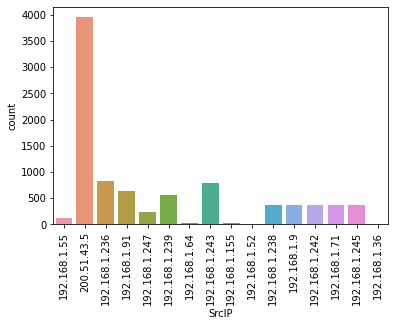

In [ ]:
#count plot for SrcID
ax = sns.countplot(x = 'SrcIP',data = df)
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

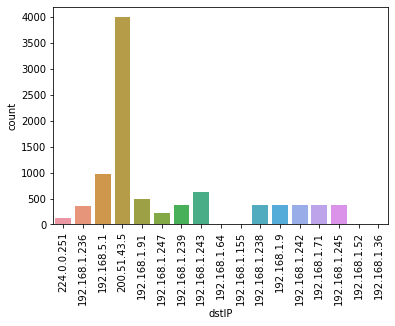

In [ ]:
#count plot for dstIP
ax = sns.countplot(x = 'dstIP',data = df)
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
#grouping timestamp and SrcIP columns with the count of DNS queries
tempdf=df.groupby(['timestamp','SrcIP']).size().reset_index(name='DNS Queries')
tempdf

,timestamp,SrcIP,DNS Queries
0,2009-09-12 19:07:32,192.168.1.55,1
1,2009-09-12 19:07:33,192.168.1.236,1
2,2009-09-12 19:07:33,192.168.1.55,1
3,2009-09-12 19:07:33,192.168.1.91,5
4,2009-09-12 19:07:33,200.51.43.5,5
...,...,...,...
1795,2009-09-12 19:28:02,192.168.1.91,1
1796,2009-09-12 19:28:03,192.168.1.91,3
1797,2009-09-12 19:28:03,200.51.43.5,2
1798,2009-09-12 19:28:04,192.168.1.91,1


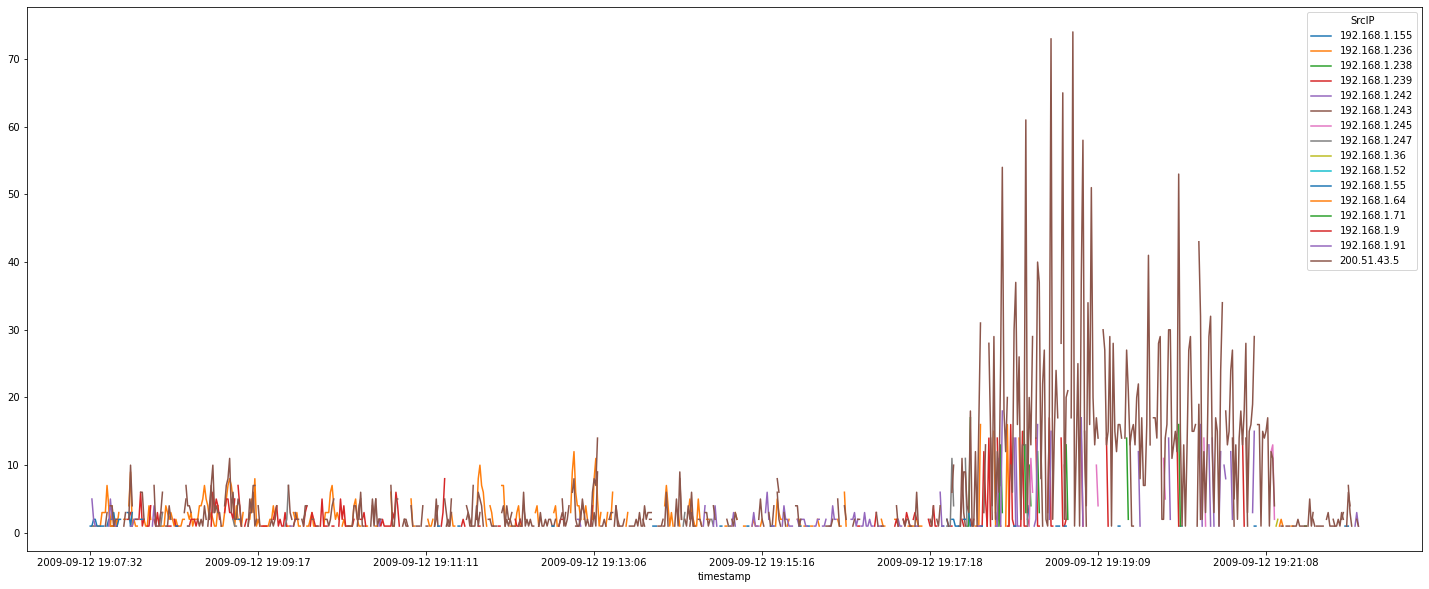

In [ ]:
#plotting timestamp on x-axis, count of DNS queries on y-axis and SrcIP as different lines
plt = tempdf.pivot(index='timestamp', columns='SrcIP', values='DNS Queries')
plt.plot(figsize=(25,10))

## 6. Resources:

https://www.tutorialspoint.com/python_penetration_testing/python_penetration_testing_network_packet_sniffing.htm

https://www.binarytides.com/python-packet-sniffer-code-linux/

https://stackoverflow.com/questions/13549294/get-all-the-layers-in-a-packet

https://seaborn.pydata.org/